### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Code to display row and column borders

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# The dataset has datatypes Int, Object and Float

### Problem Type

- The target variable in the dataset is Heart Disease


- The target variable is categorical in nature


- Solving it as a classification problem


- Based on the number of independent variables we have to classify whether the patient will have heart problems or not

In [10]:
# Checking datatypes

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
# Lets check for duplicated values

df.duplicated().sum()

0

In [12]:
# No duplicated values in the dataset

In [13]:
# Checking for missing values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
# No missing values in the dataset

In [15]:
# Column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
# data shape

df.shape

(918, 12)

In [17]:
# 918 rows and 12 columns

In [18]:
# Let's Check Dataset is balanced or unbalanced ,

hdyes = len(df[df["HeartDisease"] == 1])
print("Patients with Heart problems :",hdyes)
hdno = len(df[df["HeartDisease"] == 0])
print("Patients with healthy Heart :", hdno)

Patients with Heart problems : 508
Patients with healthy Heart : 410


In [19]:
# The dataset is Balanced 

In [20]:
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

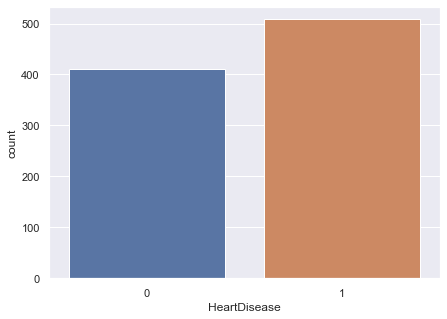

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(df["HeartDisease"])

### Exploratory Data analysis (EDA)

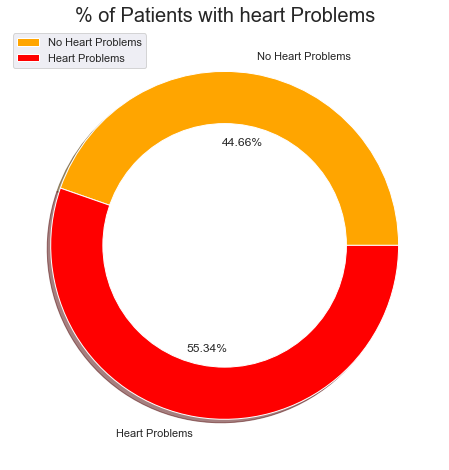

In [22]:
size = [410, 508]
hollow_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.figure(figsize=(8,8))
plt.pie(size, colors = ['orange', 'red'] , labels =["No Heart Problems", "Heart Problems"], shadow = True, autopct = '%.2f%%')
plt.title('% of Patients with heart Problems', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend(loc='upper left')
plt.show()

From the above plot, we can clearly observe that 55.34% of patients are having heart problems while 44.66 % of patients are having a healthy heart.

In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


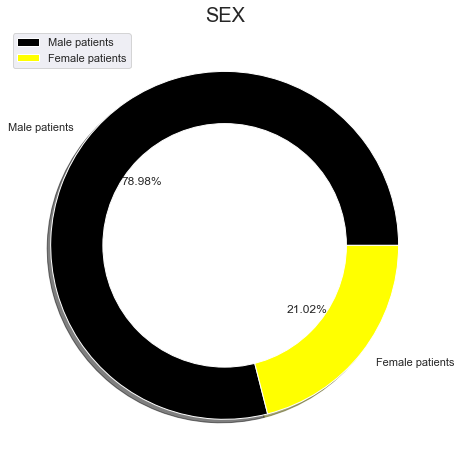

In [24]:
size = [725, 193]
hollow_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.figure(figsize=(8,8))
plt.pie(size, colors = ['black', 'yellow'] , labels =["Male patients", "Female patients"], shadow = True, autopct = '%.2f%%')
plt.title('SEX', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend(loc='upper left')
plt.show()

In [25]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

From the above plot, we can clearly see that we have more Male patients in this dataset as compared to female patients.

Text(0.5, 0, 'Age')

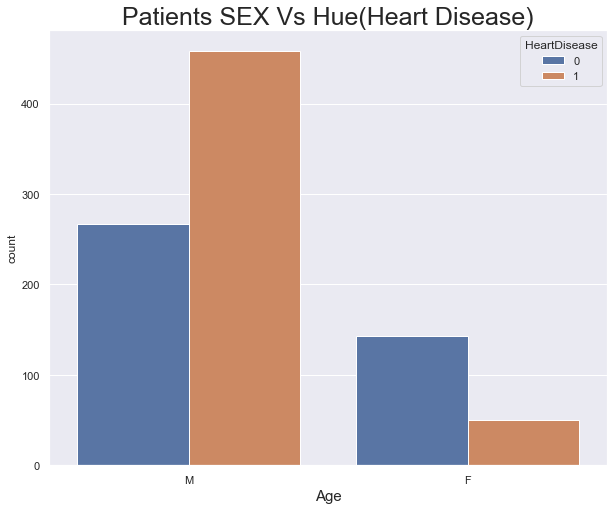

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Sex"],hue=df["HeartDisease"])
plt.title("Patients SEX Vs Hue(Heart Disease)",fontsize=25)
plt.xlabel("Age",fontsize=15)

Most of the male patients are suffering from some kind of heart problems

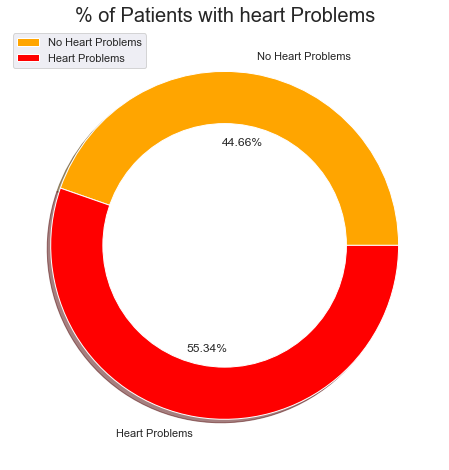

In [27]:
size = [410, 508]
hollow_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.figure(figsize=(8,8))
plt.pie(size, colors = ['orange', 'red'] , labels =["No Heart Problems", "Heart Problems"], shadow = True, autopct = '%.2f%%')
plt.title('% of Patients with heart Problems', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend(loc='upper left')
plt.show()

In [28]:
from matplotlib import style

Text(0.5, 0, 'Age')

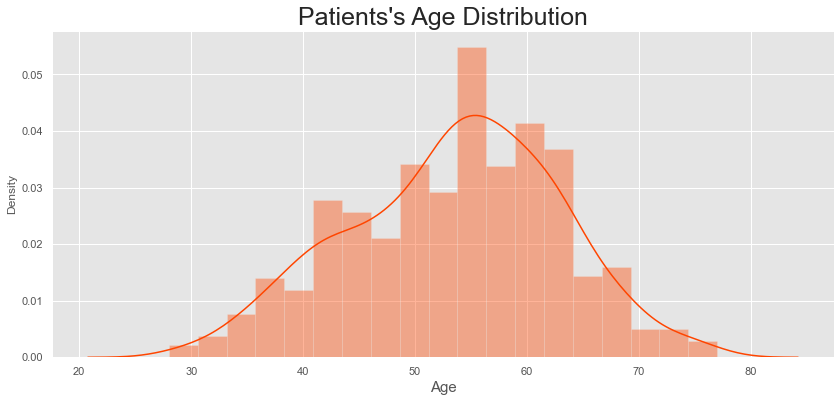

In [29]:
plt.figure(figsize=(14,6))
style.use("ggplot")
sns.distplot(df["Age"],color="orangered")
plt.title("Patients's Age Distribution",fontsize=25)
plt.xlabel("Age",fontsize=15)

In [30]:
df["Age"].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

- The mean age of patients in this dataset is 54 years


- From the above plot we can say that most of the heart problems start after the age of 30

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

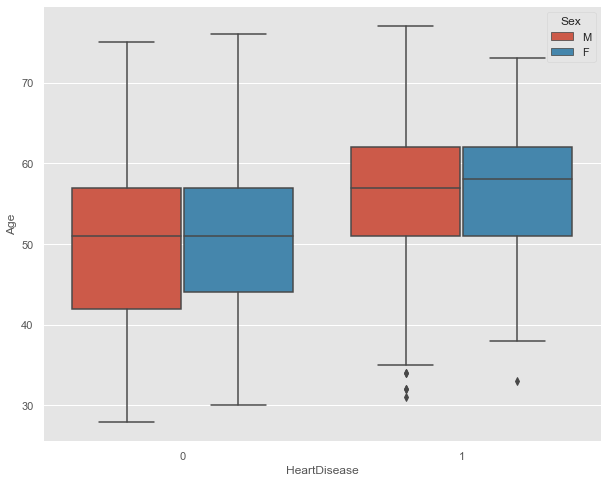

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df["HeartDisease"],y=df["Age"],hue=df["Sex"])

From the above plot, we can say that for both males and females patients are starting to have Heart problems after the age of 55.

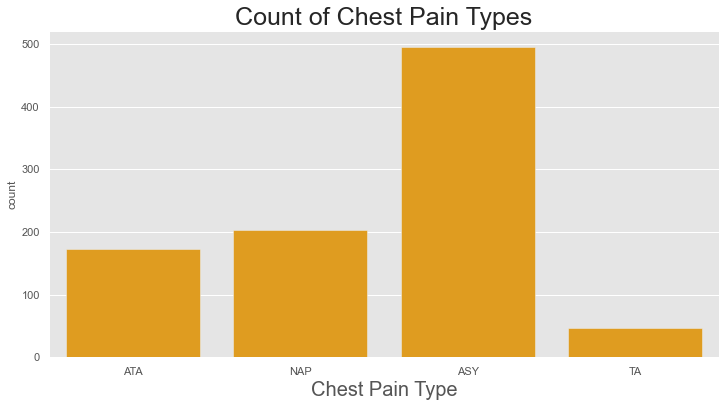

In [32]:
plt.figure(figsize=(12,6))
style.use("ggplot")
sns.countplot(df["ChestPainType"],color="orange")
plt.title("Count of Chest Pain Types",fontsize=25)
plt.xlabel("Chest Pain Type",fontsize=20)
plt.show()

In [33]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

From the above plot, we can see that most of the patients are suffering from an asymptomatic type of chest pain.

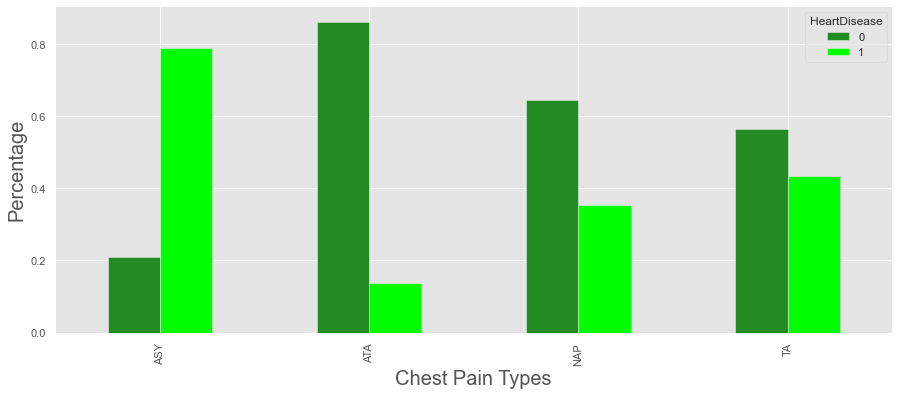

In [34]:
crosstab = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(15,6),color=['forestgreen','lime'])
plt.xlabel("Chest Pain Types",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.show()

From the above plot, we can conclude that patients suffering from an asymptomatic type of chest pain have the highest chance of acquiring heart disease.

Text(0.5, 0, 'Resting BP')

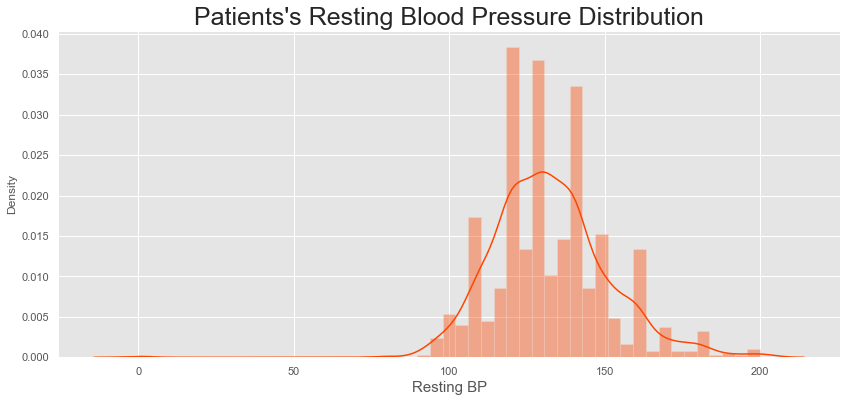

In [35]:
plt.figure(figsize=(14,6))
style.use("ggplot")
sns.distplot(df["RestingBP"],color="orangered")
plt.title("Patients's Resting Blood Pressure Distribution",fontsize=25)
plt.xlabel("Resting BP",fontsize=15)

In [36]:
df["RestingBP"].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

Average Resting Blood pressure for patients is ~132

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

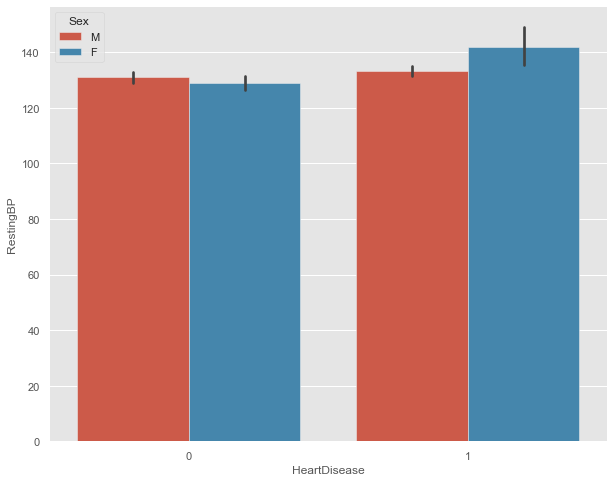

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["HeartDisease"],y=df["RestingBP"],hue=df["Sex"])

Patients suffering from Heart Problems are having higher blood pressure as compared to patients not suffering from heart problems.

Text(0.5, 0, 'Cholesterol')

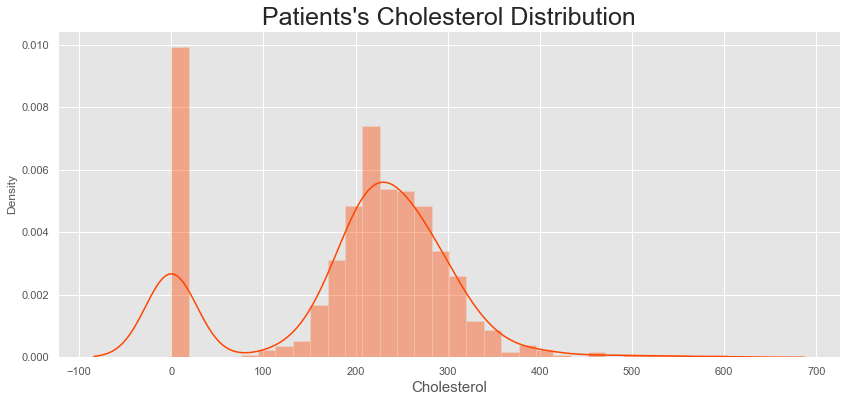

In [38]:
plt.figure(figsize=(14,6))
style.use("ggplot")
sns.distplot(df["Cholesterol"],color="orangered")
plt.title("Patients's Cholesterol Distribution",fontsize=25)
plt.xlabel("Cholesterol",fontsize=15)

In [39]:
df["Cholesterol"].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

Average cholestrol levels for patients is ~ 198.79

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

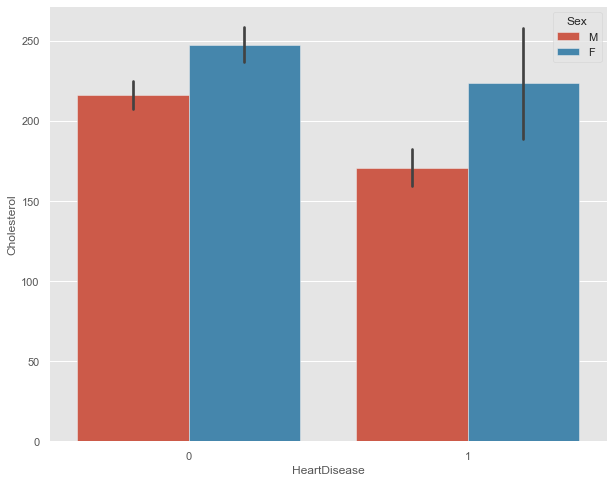

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["HeartDisease"],y=df["Cholesterol"],hue=df["Sex"])

From the above plot, we can say that male patients suffering from heart problems are having cholesterol between the range (150 - 200), and in the case of female patients the range is higher 
(225 - 250).

In [41]:
df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

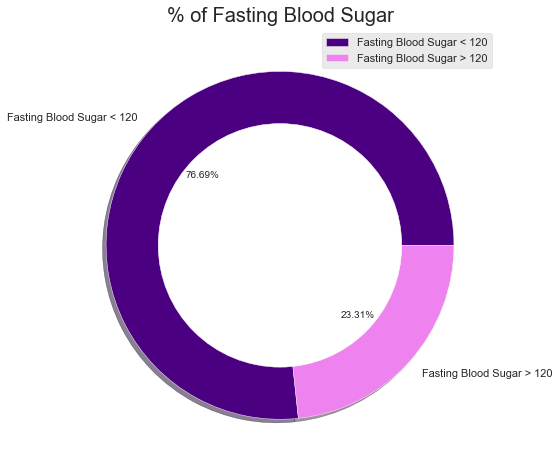

In [42]:
size = [704 , 214]
hollow_circle = plt.Circle((0,0),0.7,color="white")
plt.figure(figsize=(8,8))
plt.pie(size,colors=["indigo","violet"],labels=["Fasting Blood Sugar < 120","Fasting Blood Sugar > 120"],shadow=True,autopct = "%.2f%%")
plt.title('% of Fasting Blood Sugar', fontsize = 20)
plt.gca().add_artist(hollow_circle)
plt.legend()
plt.show()

Most of the patients are having their Fasting blood sugar less than 120.

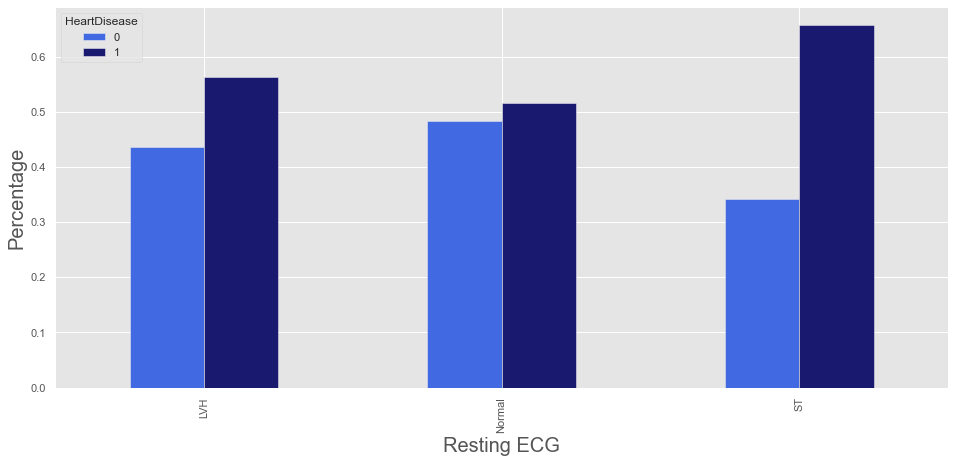

In [43]:
crosstab = pd.crosstab(df["RestingECG"],df["HeartDisease"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),color=['royalblue','midnightblue'])
plt.xlabel("Resting ECG",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.show()

Patients with resting electrocardiographic results as ST-T wave abnormality have high chance of getting heart problems

Text(0.5, 0, 'Max Heart Rate')

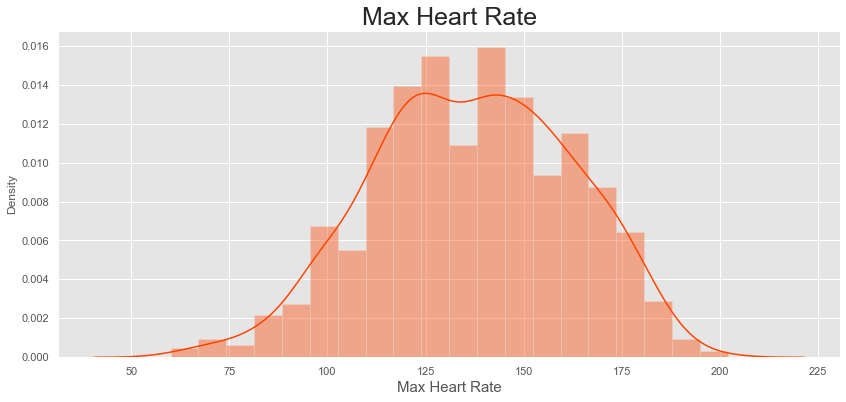

In [44]:
plt.figure(figsize=(14,6))
style.use("ggplot")
sns.distplot(df["MaxHR"],color="orangered")
plt.title("Max Heart Rate",fontsize=25)
plt.xlabel("Max Heart Rate",fontsize=15)

In [45]:
df["MaxHR"].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Average maximum heart rate for patients is about 136

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

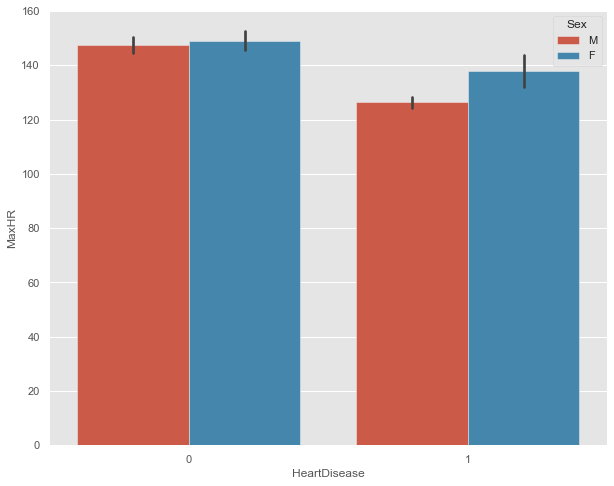

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["HeartDisease"],y=df["MaxHR"],hue=df["Sex"])

- Male patients with lower Heart Rate are having a higher chance of getting heart disease


- Female patients with heart disease are having a higher Heart rate as compared to male patients with heart disease.

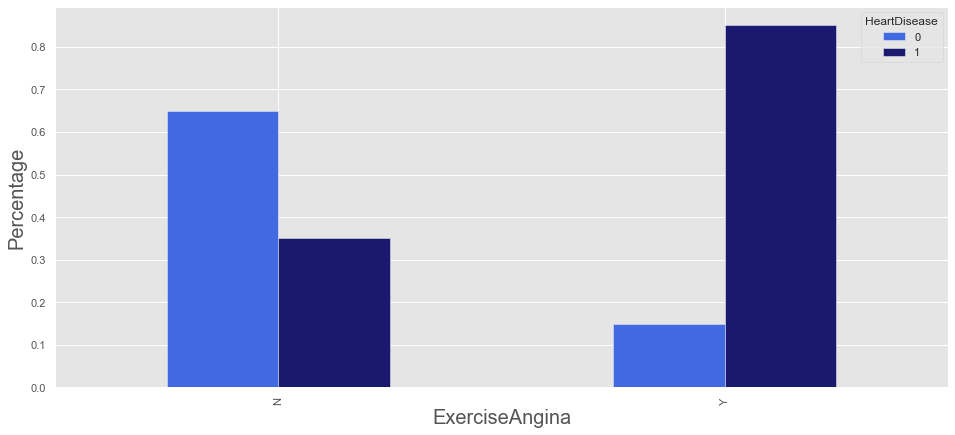

In [47]:
crosstab = pd.crosstab(df["ExerciseAngina"],df["HeartDisease"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),color=['royalblue','midnightblue'])
plt.xlabel("ExerciseAngina",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.show()

Patients having Exercise Angina have had a higher chance of developing heart disease.

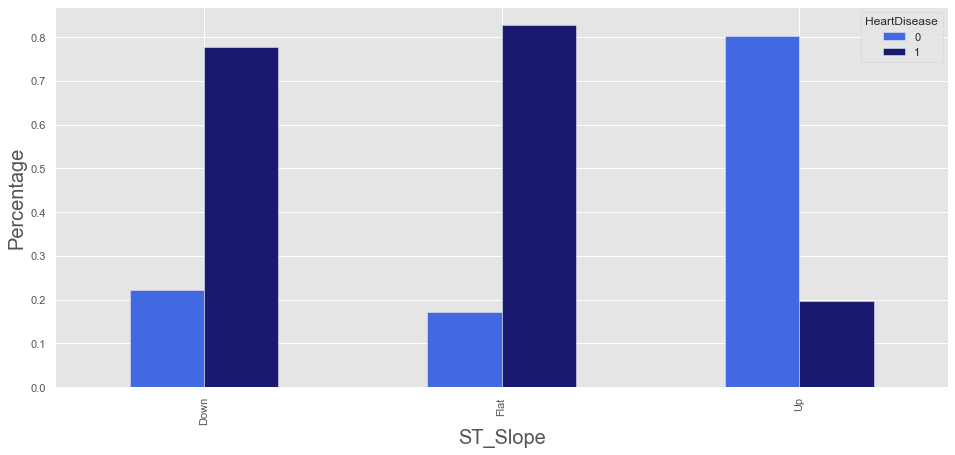

In [48]:
crosstab = pd.crosstab(df["ST_Slope"],df["HeartDisease"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),color=['royalblue','midnightblue'])
plt.xlabel("ST_Slope",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.show()

Patients with ST Slope type as Flat have the highest chance of getting Heart disease.